# 二項分布と正規分布の関係

$
\newcommand\ds{\displaystyle}
\newcommand\op{\operatorname}
\newcommand\Binomial{\op{Binomial}}
\newcommand\Normal{\op{Normal}}
\newcommand\phat{\hat{p}}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#二項分布" data-toc-modified-id="二項分布-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>二項分布</a></span></li><li><span><a href="#正規分布との近似関係" data-toc-modified-id="正規分布との近似関係-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>正規分布との近似関係</a></span></li><li><span><a href="#中心極限定理の例" data-toc-modified-id="中心極限定理の例-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>中心極限定理の例</a></span></li></ul></div>

In [1]:
using Distributions
using StatsPlots
default(fmt=:png, 
    size=(600, 340), linewidth=2, 
    tickfontsize=8, guidefontsize=12, legendfontsize=12, titlefontsize=16)

## 二項分布

あたりが出る確率が$p$のルーレットを$n$回まわしたときにちょうど$k$回あたりが出る確率は
$$
{}_nC_k p^k (1 - p)^{n-k}
$$
になる. このとき、$k$は二項分布$\Binomial(n, p)$にしたがうという. 

例えば, $n=20$, $p=0.3$, $k=3$のとき
$$
{}_nC_k p^k (1 - p)^{n-k}
= \frac{20\cdot 19\cdot 18}{3\cdot2\cdot1} 0.3^3 0.7^{17}
= 20\cdot19\cdot3\cdot0.3^3 0.7^{17}
\approx 0.072
$$

In [2]:
20*19*3*0.3^3*0.7^17

0.07160367220526223

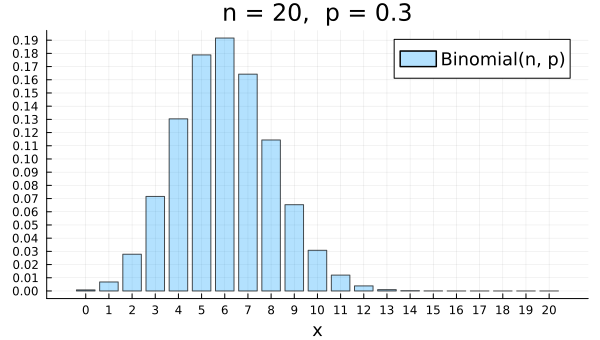

In [59]:
n, p = 20, 0.3
bar(Binomial(n, p); lw=1, la=0.7, fa=0.3, label="Binomial(n, p)")
#plot!(Normal(n*p, √(n*p*(1-p))); label="Normal(np, √(np(1-p))")
plot!(xguide="x", xtick=0:20, ytick=0:0.01:0.2)
plot!(ylim=(-0.03, 1.03).*pdf(Binomial(n, p), mode(Binomial(n, p))))
title!("n = $n,  p = $p")

二項分布$\Binomial(n, p)$にしたがう$k$の期待値は$\mu=np$になる. 

例えば, あたりが出る確率が$p=0.3$のルーレットを$n=20$回まわしたときに出るあたりの回数$k$の期待値は$\mu=20\cdot0.3=6$回になる.

二項分布$\Binomial(n, p)$にしたがう$k$の標準偏差(ばらつきの幅の大きさ)は$\sigma=\sqrt{np(1-p)}$になる. ($k$の分布は$\mu\pm2\sigma$のあいだに95%程度以上含まれる.)

例えば, あたりが出る確率が$p=0.3$のルーレットを$n=20$回まわしたときに出るあたりの回数$k$の標準偏差(ばらつきの幅の大きさ)は$\sigma=\sqrt{20\cdot0.3\cdot0.7}=\sqrt{4.2}\approx 2$になる. そのとき$k$の分布は2以上10以下に97.5%程度含まれる.

In [4]:
√(20*0.3*0.7)

2.0493901531919194

In [5]:
cdf(Binomial(20, 0.3), 10)- cdf(Binomial(20, 0.3), 1)

0.9752179237945415

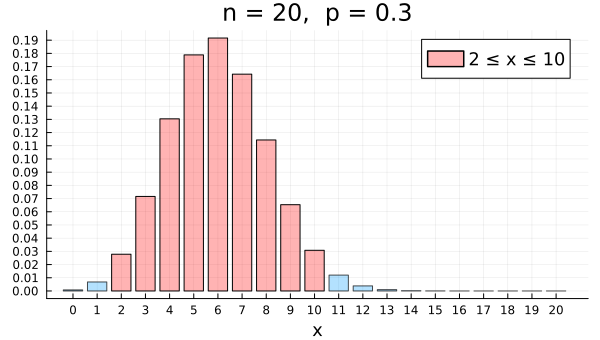

In [58]:
n, p = 20, 0.3
bar(0:1, Binomial(n, p); lw=1, c=1, la=0.7, fa=0.3, label="")
bar!(11:20, Binomial(n, p); lw=1, c=1, la=0.7, fa=0.3, label="")
bar!(2:10, Binomial(n, p); lw=1, c=:red, la=1, fa=0.3, label="2 ≤ x ≤ 10")
#plot!(Normal(n*p, √(n*p*(1-p))); c=2, label="Normal(np, √(np(1-p))")
plot!(xguide="x", xtick=0:20, ytick=0:0.01:0.2)
plot!(ylim=(-0.03, 1.03).*pdf(Binomial(n, p), mode(Binomial(n, p))))
title!("n = $n,  p = $p")

二項分布$\Binomial(n, p)$にしたがう$k$について$\phat=k/n$ (あたりが確率$p$で出るルーレットを$n$回まわしたときに出たあたりの回数の割合)の期待値は$\ds \frac{np}{n}=p$になり, 標準偏差は$\ds\frac{\sqrt{np(1-p)}}{n}=\sqrt{\frac{p(1-p)}{n}}$になる.

## 正規分布との近似関係

期待値$\mu$と標準偏差$\sigma$を持つ正規分布$\Normal(\mu, \sigma)$の確率密度関数は
$$
f_\text{normal}(x|\mu,\sigma) =
\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right),
\quad \exp(X)=e^X.
$$

$np$と$n(1-p)$が十分大きいならば, 二項分布での確率は二項分布と同じ期待値と標準偏差を持つ正規分布の確率密度で近似されることが知られている:
$$
{}_nC_k p^k (1 - p)^{n-k} \approx
f_\text{normal}(k|np,\sqrt{np(1-p)}) =
\frac{1}{\sqrt{2\pi np(1-p)}} \exp\left(-\frac{(k-\mu)^2}{2np(1-p)}\right).
$$
例えば$n=20$, $p=0.3$の場合については以下のグラフを参照せよ.

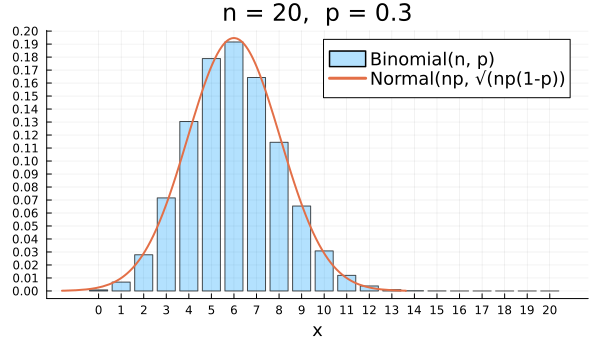

In [60]:
n, p = 20, 0.3
bar(Binomial(n, p); lw=1, la=0.7, fa=0.3, label="Binomial(n, p)")
plot!(Normal(n*p, √(n*p*(1-p))); label="Normal(np, √(np(1-p))")
plot!(xguide="x", xtick=0:20, ytick=0:0.01:0.2)
plot!(ylim=(-0.03, 1.03).*pdf(Normal(n*p, √(n*p*(1-p))), mode(Normal(n*p, √(n*p*(1-p))))))
title!("n = $n,  p = $p")

In [8]:
n, p = 20, 0.3
bin = Binomial(n, p)
normal = Normal(mean(bin), std(bin))
stack(Any[k, pdf(bin, k), pdf(normal, k), (pdf(normal, k) - pdf(bin, k))] for k in 0:20)'

21×4 adjoint(::Matrix{Any}) with eltype Any:
  0  0.000797923  0.00267931    0.00188139
  1  0.00683934   0.00992527    0.00308593
  2  0.0278459    0.0289773     0.00113142
  3  0.0716037    0.0666761    -0.00492762
  4  0.130421     0.120915     -0.00950644
  5  0.178863     0.172816     -0.00604715
  6  0.191639     0.194664      0.00302492
  7  0.164262     0.172816      0.00855391
  8  0.114397     0.120915      0.0065178
  9  0.0653696    0.0666761     0.00130649
 10  0.0308171    0.0289773    -0.00183979
 11  0.0120067    0.00992527   -0.00208139
 12  0.00385928   0.00267931   -0.00117997
 13  0.00101783   0.000570034  -0.000447798
 14  0.000218107  9.55818e-5   -0.000122525
 15  3.73898e-5   1.26312e-5   -2.47585e-5
 16  5.00756e-6   1.31557e-6   -3.69199e-6
 17  5.04964e-7   1.07988e-7   -3.96976e-7
 18  3.60688e-8   6.98614e-9   -2.90827e-8
 19  1.62717e-9   3.562e-10    -1.27097e-9
 20  3.48678e-11  1.43136e-11  -2.05543e-11

$np$と$n(1-p)$が十分大きなとき, 二項分布$\Binomial(n,p)$にしたがう$x$は正規分布$\Normal(np, \sqrt{np(1-p)})$に近似的にしたがう.

ゆえに$x-np$は期待値がゼロの正規分布$\Normal(0, \sqrt{np(1-p)})$に近似的にしたがう.

ゆえに$\ds z=\frac{x-np}{\sqrt{np(1-p)}}$は標準正規分布$\Normal(0, 1)$に近似的にしたがう.

$\ds \phat = \frac{x}{n}$とおくと, $\ds z=\frac{\phat-p}{\sqrt{p(1-p)/n}}$となることに注意せよ.

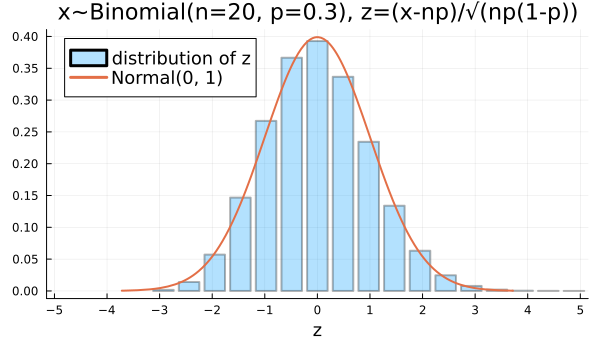

In [9]:
n, p = 20, 0.3
bin = Binomial(n, p)
supp = support(bin)
μ, σ = mean(bin), std(bin)
bar((supp .- μ)/σ, pdf.(bin, supp)*σ; alpha=0.3, label="distribution of z")
plot!(Normal(); label="Normal(0, 1)")
plot!(legend=:topleft)
plot!(xtick=-10:10, ytick=0:0.05:0.5)
title!("x~Binomial(n=$n, p=$p), z=(x-np)/√(np(1-p))", titlefontsize=15)
plot!(xlim=(-5*1.03, 5*1.03), ylim=(-0.03, 1.03) .* pdf(Normal(), mode(Normal())))
plot!(xguide="z")

標準正規分布にしたがう$x$について, $|x|\le 1.96$となる確率はほぼぴったり$95\%$になることが知られている(約$95.00042\%$になる).

In [10]:
1 - 2ccdf(Normal(), 1.96)

0.9500042097035591

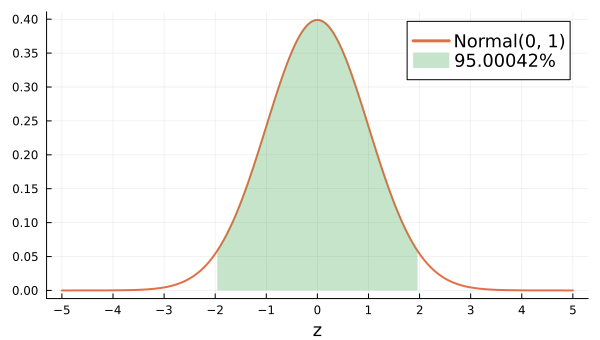

In [11]:
plot(Normal(), -5, 5; c=2, label="Normal(0, 1)")
plot!(Normal(), -1.96, 1.96; c=2, la=0, fillrange=0, fc=3, fa=0.3, label="95.00042%")
plot!(xtick=-5:5, ytick=0:0.05:0.5)
plot!(xguide="z")

ゆえに, $np$と$n(1-p)$が十分大きなとき, 二項分布$\Binomial(n,p)$にしたがう$x$について, 
$$
\ds |z|=\left|\frac{x-np}{\sqrt{np(1-p)}}\right|=\left|\frac{\phat-p}{\sqrt{p(1-p){\big/}n}}\right|
\le 1.96
$$
となる確率は$95\%$で近似される.

In [12]:
function plot_bin196(n, p)
    bin = Binomial(n, p)
    supp = support(bin)
    μ, σ = mean(bin), std(bin)
    rejection_region = [x for x in supp if abs(x - μ)/σ > 1.96]
    acceptance_region = [x for x in supp if abs(x - μ)/σ ≤ 1.96]
    @show prob = sum(pdf(bin, x) for x in acceptance_region)
    bar((rejection_region .- μ)/σ, pdf.(bin, rejection_region)*σ; c=1, alpha=0.3, label="", lw=1)
    bar!((acceptance_region .- μ)/σ, pdf.(bin, acceptance_region)*σ; c=:red, alpha=0.3, label="$(round(100prob; sigdigits=3))%", lw=1)
    plot!(Normal(); c=2, label="Normal(0, 1)", lw=1.5, ls=:dot)
    vline!([-1.96, 1.96]; c=3, label="z = ±1.96", lw=1)
    plot!(legend=:topleft)
    plot!(xtick=-10:10, ytick=0:0.05:0.5)
    title!("x~Binomial(n=$n, p=$p), z=(x-np)/√(np(1-p))", titlefontsize=15)
    plot!(xlim=(-5*1.03, 5*1.03), ylim=(-0.03, 1.03) .* pdf(Normal(), mode(Normal())))
    plot!(xguide="z")
end

plot_bin196 (generic function with 1 method)

prob = sum((pdf(bin, x) for x = acceptance_region)) = 0.9752179237945404


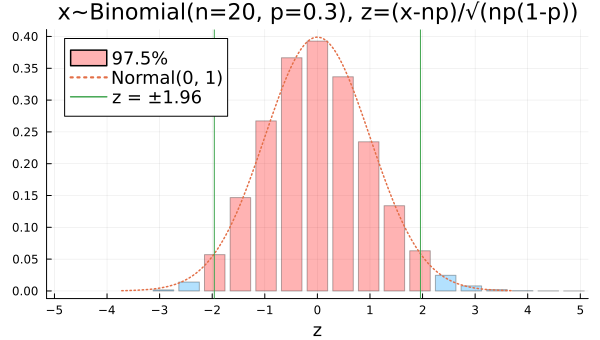

In [13]:
plot_bin196(20, 0.3)

In [14]:
plot_bin196(μ 0.3)

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file://D:/OneDrive/public/0052/In[14]#1:15\[90mIn[14]:1:15[0;0m]8;;\
plot_bin196(μ [48;2;120;70;70m0.3[0;0m)
[90m#             └─┘ ── [0;0m[91mExpected `)`[0;0m

prob = sum((pdf(bin, x) for x = acceptance_region)) = 0.9627960662628591


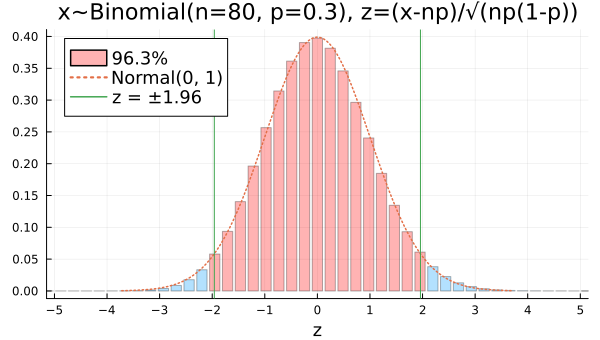

In [15]:
plot_bin196(80, 0.3)

prob = sum((pdf(bin, x) for x = acceptance_region)) = 0.9560955343559724


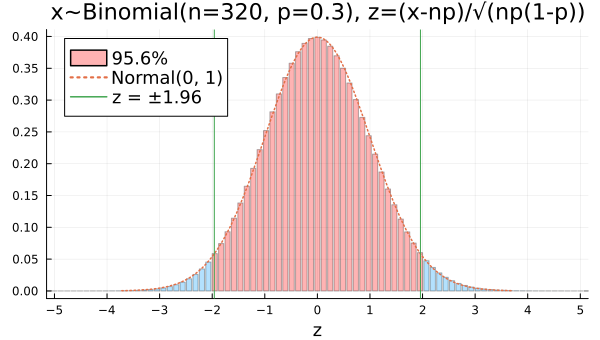

In [16]:
plot_bin196(320, 0.3)

prob = sum((pdf(bin, x) for x = acceptance_region)) = 0.9526129542518776


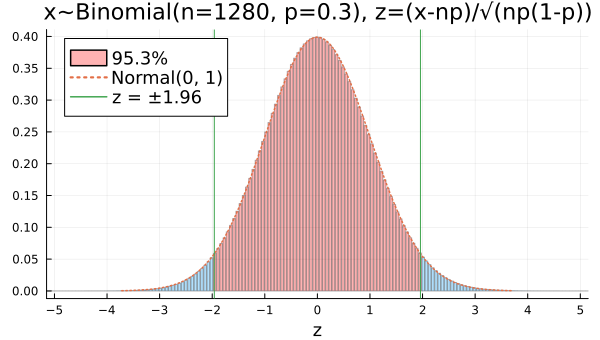

In [17]:
plot_bin196(1280, 0.3)

## 中心極限定理の例

  0.204006 seconds (2.05 M allocations: 162.674 MiB, 14.33% gc time, 29.11% compilation time)
normal = Normal(42, √35) = Normal{Float64}(μ=42.0, σ=5.916079783099616)


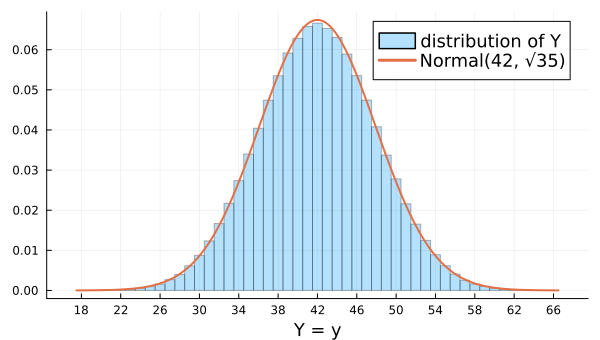

In [18]:
n = 12
niters = 10^6
@time Y = [sum(rand(1:6, n)) for _ in 1:niters]
@show normal = Normal(42, √35)

histogram(Y; alpha=0.3, lw=1, norm=true, bin=17.5:66.5, 
    label="distribution of Y")
plot!(normal, 17.5, 66.5; label="Normal(42, √35)")
plot!(ylim=(-0.03, 1.03).*pdf(normal, mode(normal)))
plot!(xtick=2:4:6n)
plot!(xguide="Y = y")

In [19]:
μ_X, σ_X = 100, 5
n = 9
b = 4
@show μ_X σ_X n b
@show μ_Y = n*μ_X + b
@show σ_Y = √(n*σ_X^2);

μ_X = 100
σ_X = 5
n = 9
b = 4
μ_Y = n * μ_X + b = 904
σ_Y = √(n * σ_X ^ 2) = 15.0


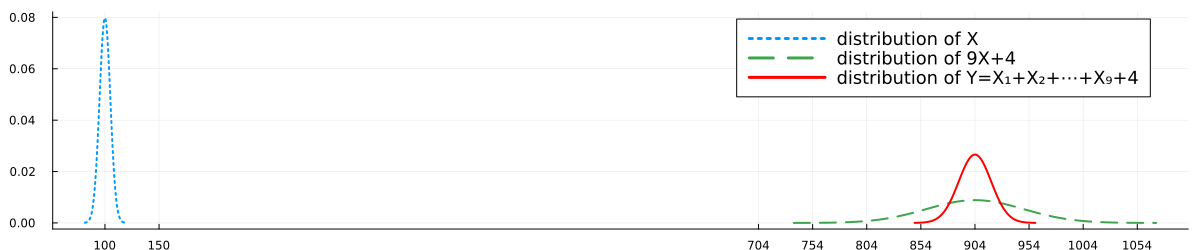

In [20]:
plot(Normal(μ_X, σ_X); label="distribution of X", ls=:dot)
plot!(n*Normal(μ_X, σ_X)+b; label="distribution of $(n)X+$(b)", ls=:dash, c=3)
plot!(Normal(μ_Y, σ_Y); label="distribution of Y=X₁+X₂+⋯+X₉+$b", ls=:solid, c=:red)
plot!(xtick=[0:50:150; 704:50:1204])
plot!(size=(1200, 250))

In [32]:
x = [164, 165, 166, 169, 169, 170, 174, 176, 177, 180]
n = length(x)
@show x
@show n
@show x̄ = sum(x[i] for i in 1:n) / n
@show σ̂²= sum((x[i] - x̄)^2 for i in 1:n) / n
@show σ̂ = √σ̂²
@show s² = sum((x[i] - x̄)^2 for i in 1:n) / (n - 1)
@show s = √s²;

x = [164, 165, 166, 169, 169, 170, 174, 176, 177, 180]
n = 10
x̄ = sum((x[i] for i = 1:n)) / n = 171.0
σ̂² = sum(((x[i] - x̄) ^ 2 for i = 1:n)) / n = 27.0
σ̂ = √σ̂² = 5.196152422706632
s² = sum(((x[i] - x̄) ^ 2 for i = 1:n)) / (n - 1) = 30.0
s = √s² = 5.477225575051661


In [45]:
@show a = binomial(10, 8) * 0.9^8 * 0.1^2
@show b = binomial(10, 9) * 0.9^9 * 0.1
@show c = binomial(10, 10) * 0.9^10
@show Q = a + b + c
@show P = 1 - Q
r(x) = round(x; digits=6)
@show r(a) r(b) r(c)
@show q = r(a) + r(b) + r(c);
@show p = 1 - q;

a = binomial(10, 8) * 0.9 ^ 8 * 0.1 ^ 2 = 0.19371024450000007
b = binomial(10, 9) * 0.9 ^ 9 * 0.1 = 0.38742048900000015
c = binomial(10, 10) * 0.9 ^ 10 = 0.3486784401000001
Q = a + b + c = 0.9298091736000003
P = 1 - Q = 0.07019082639999974
r(a) = 0.19371
r(b) = 0.38742
r(c) = 0.348678
q = r(a) + r(b) + r(c) = 0.929808
p = 1 - q = 0.07019200000000003


In [50]:
@show a = binomial(10, 7) * 0.4^7 * 0.6^3
@show b = binomial(10, 8) * 0.4^8 * 0.6^2
@show c = binomial(10, 9) * 0.4^9 * 0.6
@show d = binomial(10, 10) * 0.4^10
@show P = a + b + c + d
r(x) = round(x; digits=6)
@show r(a) r(b) r(c) r(d)
@show p = r(a) + r(b) + r(c) + r(d);i

a = binomial(10, 7) * 0.4 ^ 7 * 0.6 ^ 3 = 0.04246732800000001
b = binomial(10, 8) * 0.4 ^ 8 * 0.6 ^ 2 = 0.010616832000000005
c = binomial(10, 9) * 0.4 ^ 9 * 0.6 = 0.0015728640000000009
d = binomial(10, 10) * 0.4 ^ 10 = 0.00010485760000000006
P = a + b + c + d = 0.05476188160000002
r(a) = 0.042467
r(b) = 0.010617
r(c) = 0.001573
r(d) = 0.000105
p = r(a) + r(b) + r(c) + r(d) = 0.054762


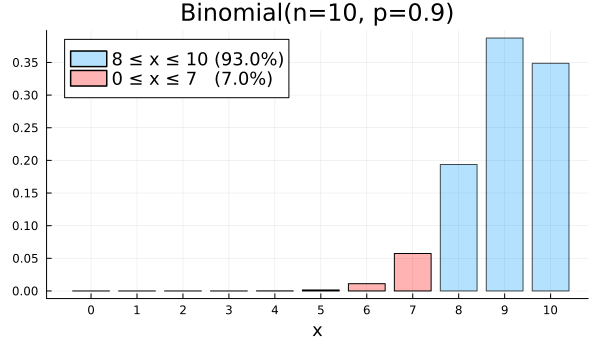

In [74]:
n, p = 10, 0.9
bar(8:n, Binomial(n, p); lw=1, c=1, la=0.7, fa=0.3,
    label="8 ≤ x ≤ 10 ($(round(100ccdf(Binomial(n, p), 7); digits=1))%)")
bar!(0:7, Binomial(n, p); lw=1, c=:red, la=1, fa=0.3,
    label="0 ≤ x ≤ 7   ($(round(100cdf(Binomial(n, p), 7); digits=1))%)")
#plot!(Normal(n*p, √(n*p*(1-p))); c=2, label="Normal(np, √(np(1-p))")
plot!(xguide="x", xtick=0:20, ytick=0:0.05:1)
plot!(ylim=(-0.03, 1.03).*pdf(Binomial(n, p), mode(Binomial(n, p))))
title!("Binomial(n=$n, p=$p)")

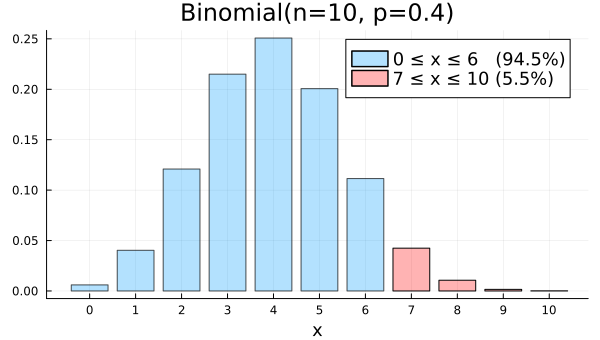

In [73]:
n, p = 10, 0.4
bar(0:6, Binomial(n, p); lw=1, c=1, la=0.7, fa=0.3,
    label="0 ≤ x ≤ 6   ($(round(100cdf(Binomial(n, p), 6); digits=1))%)")
bar!(7:10, Binomial(n, p); lw=1, c=:red, la=1, fa=0.3,
    label="7 ≤ x ≤ 10 ($(round(100ccdf(Binomial(n, p), 6); digits=1))%)")
#plot!(Normal(n*p, √(n*p*(1-p))); c=2, label="Normal(np, √(np(1-p))")
plot!(xguide="x", xtick=0:20, ytick=0:0.05:1)
plot!(ylim=(-0.03, 1.03).*pdf(Binomial(n, p), mode(Binomial(n, p))))
title!("Binomial(n=$n, p=$p)")

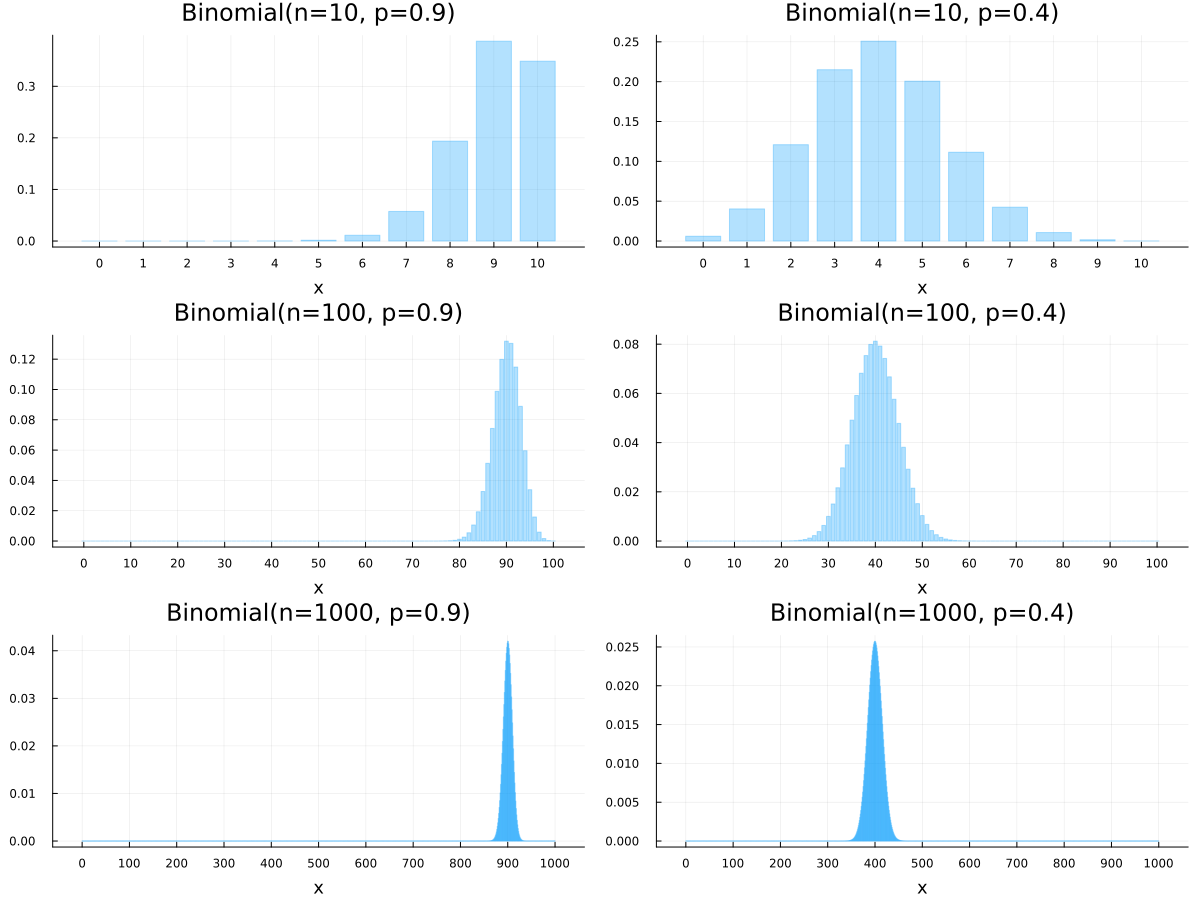

In [83]:
PP = []
for n in (10, 100, 1000), p in (0.9, 0.4)
    P = bar(Binomial(n, p); lw=1, c=1, lc=1, la=0.3, fa=0.3, label="")
    plot!(xguide="x", xtick=0:(n÷10):n)
    plot!(ylim=(-0.03, 1.03).*pdf(Binomial(n, p), mode(Binomial(n, p))))
    title!("Binomial(n=$n, p=$p)")
    push!(PP, P)
end
plot(PP...; size=(1200, 900), layout=(3, 2))